# Import required labraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,10)
from collections import Counter
# make it easier to understand by importing the required libraries within keras
#from tensorflow.keras.layers import Dense, Flatten
import tensorflow as tfa
!pip install tensorflow-addons
import tensorflow_addons as tfaA
from statistics import mean
import os
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.datasets import make_classification, make_circles
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Read DataSet

In [2]:
# np.savetxt("X_trainSetBest.csv", X_trainSet, delimiter=",")
# np.savetxt("X_valSetBest.csv", X_valSet, delimiter=",")
# np.savetxt("X_testSetBest.csv", X_testSet, delimiter=",")

In [3]:
# np.savetxt("y_trainSet.csv", y_trainSet, delimiter=",")
# np.savetxt("y_valSet.csv", y_valSet, delimiter=",")
# np.savetxt("y_testSet.csv", y_testSet, delimiter=",")

Read (X) train, validation,test data

In [2]:
# "X_trainSetBest.csv"
link_Xtrain = 'https://drive.google.com/uc?id=1ZED6gMTHiVjnJYxn34PaaC4YE58RoXSK'
X_trainSet = pd.read_csv(link_Xtrain, header= None)
# "X_valSetBest.csv"
link_Xval = 'https://drive.google.com/uc?id=1xcNv4DmUz8C5gtGOem23GbhRrAQ-m8pB'
X_valSet = pd.read_csv(link_Xval, header= None)
# "X_valSetBest.csv"
link_Xtest = 'https://drive.google.com/uc?id=1V-F5sbPyh4EwLjCOSlfeQ0B4P9d22pSh'
X_testSet = pd.read_csv(link_Xtest, header= None)
X_trainSet.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.682386,-0.318563,-0.709785,-0.335537,-0.366763,-0.787591,-0.170066,-0.279034,-0.266725,-0.163127,-1.251816,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.109868,-0.416408,-0.416164
1,-0.682386,-0.319889,-0.709677,-0.715896,-0.367768,-0.741234,-0.166178,-0.278558,-0.263902,-0.120959,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.108660,-0.415565,-0.415482
2,0.382197,-0.291219,0.321926,1.333552,4.203925,0.418716,-0.170066,-0.279034,-0.266476,-0.161070,-0.389051,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.105037,3.759201,3.759206
3,-1.480822,-0.307835,-0.194000,-0.176054,0.711352,-0.736083,-0.167150,-0.278760,-0.022965,4.979328,0.473713,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.105037,0.409165,0.409257
4,1.180634,-0.315602,-0.709446,-0.138653,-0.354670,0.577359,-0.170066,-0.279034,-0.266472,-0.161070,-1.251816,-0.179197,-0.280256,-0.179197,-0.280256,-0.179197,-0.109868,-0.400727,-0.400698


In [4]:
# "X_trainSetBest_copy.csv"
link_Xtrain_copy = 'https://drive.google.com/uc?id=1Sb7u4DKWdzhFZaYbv4ZzMhnHOQuG76O0'
X_trainSet_copy = pd.read_csv(link_Xtrain_copy, header= None)
# "X_valSetBest_copy.csv"
link_Xval_copy = 'https://drive.google.com/uc?id=1GfzD1H8MteSoqlEAxqnFRsPJIZZbF34w'
X_valSet_copy = pd.read_csv(link_Xval_copy, header= None)
# "X_valSetBest_copy.csv"
link_Xtest_copy = 'https://drive.google.com/uc?id=16zdmkESfQUTSS3fpk3Eo0dSESVteZdRD'
X_testSet_copy = pd.read_csv(link_Xtest_copy, header= None)
X_trainSet_copy.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,3.0,1.0,240.0,16586.0,12622603.0,467.0,126.0,0.0,0.0,280.0,...,5.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,819.0,757.0
1,3.0,2.0,158.0,20530.0,35464.0,376.0,171.0,4.0,556.0,3407.0,...,5.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,1018.0,918.0
2,7.0,3.0,1930.0,37881404.0,67857371.0,414333.0,1297.0,0.0,0.0,556.0,...,5.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,987400.0,987276.0
3,0.0,4.0,903.0,18946410.0,17900326.0,98088.0,176.0,3.0,320.0,270280.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,8.0,195879.0,195780.0
4,10.0,1.0,423.0,29020.0,19138042.0,1562.0,1451.0,0.0,0.0,560.0,...,5.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4524.0,4411.0


Read (y) train, validation,test data

In [5]:
# "y_trainSet.csv"
link_ytrain = 'https://drive.google.com/uc?id=1IEeWLBJNTUY3zW3iWwtOhLfG9hO9a6ty'
y_trainSet = pd.read_csv(link_ytrain, header= None)
# "y_valSet.csv"
link_yval = 'https://drive.google.com/uc?id=19acD7xAqYrSs4o3_cdA_38oVvhP02wt2'
y_valSet = pd.read_csv(link_yval, header= None)
# "y_valSet.csv"
link_ytest =  'https://drive.google.com/uc?id=1VoKohbDBMYOaN3132mPPAQaTcWMyJSx8'
y_testSet = pd.read_csv(link_ytest, header= None)
y_trainSet.head()

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
# "y_trainSet_copy.csv"
link_ytrain_copy = 'https://drive.google.com/uc?id=14UXFNaGgtTIr83PTUD4K6OyGch7JcdCJ'
y_trainSet_copy = pd.read_csv(link_ytrain_copy, header= None)
# "y_valSet_copy.csv"
link_yval_copy = 'https://drive.google.com/uc?id=1IgN_VLsqpdEaL4iEGSFjxnGoQbYE--K8'
y_valSet_copy = pd.read_csv(link_yval_copy, header= None)
# "y_valSet_copy.csv"
link_ytest_copy =  'https://drive.google.com/uc?id=1kMk1Q5DHFdez5zX03ZWdefBKR3cIS-07'
y_testSet_copy = pd.read_csv(link_ytest_copy, header= None)
y_trainSet_copy.head()

,0
0,5.0
1,5.0
2,2.0
3,4.0
4,3.0


# Functions

In [7]:
!pip install tensorflow-addons
from tensorflow_addons.optimizers import AdamW

In [8]:
def plot_tsne(X, y, target_names,title):
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(X)
    target_ids = range(len(target_names))
    print(X_2d[0])
    print(X_2d[1])
    print(X_2d[2])
 
    plt.figure(figsize=(6, 5))
    colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
    
    plt.title(title)
    plt.legend()
    plt.show()

def getConfusionMatrix(model,X_test,y_test,title):
    """plot the confusion matrix of a model
    Input: model, X_test, y_test
    Output: print the confusion matrix
    """
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.title(title)
    plt.show()
# create function that build the model 
def build_compile_fit_MLP(BS=1,HL=1,LR=0.001,AF='relu',op="adamW",NN=10):
  """
  this function used to build the network and compile and fit  the model and 
  input : 
    BS : Batch size 
    HL : Hidden Layers 
    LR : Learning rate 
    AF : Activation function 
  output : return a model 
  """

  model = tfa.keras.Sequential()
  # add the input layer
  input =  tfa.keras.layers.Input(shape=(X_trainSet.shape[1],))
  model.add(input)
  
  # add the hidden layers 
  for h in range(HL):
    model.add(tfa.keras.layers.Dense(NN, activation=AF)) 
    
  # add the output layer 
  model.add(tfa.keras.layers.Dense(6, activation='softmax'))

  if(op == "adamW"):
    optimizer=AdamW(learning_rate=LR, weight_decay=.00001)
  elif(op=="SGD_1"):
    optimizer=tfa.keras.optimizers.SGD(learning_rate=LR,momentum=0.1,nesterov=False,name='SGD')
  elif(op=="SGD_5"):
    optimizer=tfa.keras.optimizers.SGD(learning_rate=LR,momentum=0.5,nesterov=False,name='SGD')
  elif(op=="SGD_9"):
    optimizer=tfa.keras.optimizers.SGD(learning_rate=LR,momentum=0.9,nesterov=False,name='SGD')
  elif(op=="Rprop"):
    optimizer=tfa.keras.optimizers.RMSprop(learning_rate=LR,rho=0.9,momentum=0.1,epsilon=1e-07,centered=False,name='RMSprop')
  else : 
    optimizer = op

  # compile the model 
  model.compile(
    loss=tfa.keras.losses.categorical_crossentropy,
    optimizer = optimizer,metrics=['accuracy'])

  # fit the model 
  history = model.fit(x= X_trainSet,y = y_trainSet, validation_data= (X_testSet, y_testSet),epochs=500, batch_size=BS, verbose=0)

  return model,history

def get_accuracies(model,model_history):
  training_Acc = model_history.history['accuracy'][-1]*100
  testing_Acc = model.evaluate(X_testSet, y_testSet)[1]*100
  val_acc = model.evaluate(X_valSet,y_valSet)[1]*100
  return training_Acc,testing_Acc , val_acc

def plot_n_Epoch_VS_Accuracy(model_history):
  plt.title("numer of epochs versus training and testing losses")
  plt.plot(np.log10(model_history.history['loss']))
  plt.plot(np.log10(model_history.history['val_loss']), 'r')
  plt.legend(['train loss', 'test loss'])
  plt.xlabel("# of epochs")
  plt.grid()

def build_5_time_testingBased(BS=1,HL=1,LR=0.001,AF='relu',op="adamW",NN=10):
  # build and compile the model 

  # to collect the accuracies to calculate the max and the min 
  train_accs = []
  test_accs = []
  val_accs = []

  # to collect the training and testing loss 
  total_training_loss = []
  total_testing_loss = []

  total_y_pred=[]
  total_y_pred_result=[]

  # build model
  for i in range(5):
    print(f"run {i+1}:")
    # build the model
    model ,model_history = build_compile_fit_MLP(BS,HL,LR,AF,op,NN)

    # get the training , validation and testing accuracies 
    train_acc,test_acc,val_acc= get_accuracies(model,model_history)

    y_pred=model.predict(X_testSet)
    #print(y_pred)

    # result=np.where(y_pred == np.amax(y_pred), 1, 0)
    result = np.array
    total_y_pred.append(y_pred)
    total_y_pred_result.append(result)
    #print(result)

    train_accs.append(train_acc)
    test_accs.append(test_acc)
    val_accs.append(val_acc)
    
    total_training_loss.append(list(model_history.history['loss']))
    total_testing_loss.append(list(model_history.history['val_loss']))
    print("===========================================================================")

  #find the minimum , maximum , average 

  max_train_acc = np.max(train_accs)
  min_train_acc = np.min(train_accs)
  avg_train_acc = np.average(train_accs)
  
  max_test_acc = np.max(test_accs)
  min_test_acc = np.min(test_accs)
  avg_test_acc = np.average(test_accs)

  avg_val_acc = np.average(val_accs)

  print(f"min training   accuracy {min_train_acc}%")
  print(f"max training   accuracy {max_train_acc}%")
  print(f"avg training   accuracy {avg_train_acc}%")

  print(f"min testing    accuracy {min_test_acc}%")
  print(f"max testing    accuracy {max_test_acc}%")
  print(f"avg testing    accuracy {avg_test_acc}%")

  print(f"avg validation    accuracy {avg_val_acc}%")

  return   max_train_acc,min_train_acc,avg_train_acc ,max_test_acc ,min_test_acc , avg_test_acc , total_training_loss ,total_testing_loss ,total_y_pred,total_y_pred_result ,avg_val_acc


def plot_trLoss_VS_tsLoss_5_times(total_training_loss,total_testing_loss):
  for i in range(5):
    f=plt.subplot(2,5,i+1)
    f.figure.set_size_inches(30,10)
    plt.plot(np.log10(total_training_loss[i]))
    plt.plot(np.log10(total_testing_loss[i]),'r')
    plt.legend(['train loss', 'testing loss']) 
    plt.title("run # %d"%(i+1))
    plt.xlabel("# of epochs")
    plt.ylabel("loss")
    plt.grid()


In [9]:
def draw_df(val0,val1,val2,val3,val4,val5):

  col=['Max training acc ()%',
  'Max test acc ()%',
  'Min training acc ()%',
  'Min test acc ()%',
  'Avg training acc ()%',
  'Avg test acc ()%',]
 
  draw_df=pd.DataFrame(data=[val0],columns=['Max training acc ()%'])
  draw_df[col[1]]=val1
  draw_df[col[2]]=val2
  draw_df[col[3]]=val3
  draw_df[col[4]]=val4
  draw_df[col[5]]=val5
  draw_df=draw_df.style.set_table_styles(
    [{"selector": "", "props": [("border", "1px solid grey")]},
      {"selector": "tbody td", "props": [("border", "1px solid grey")]},
     {"selector": "th", "props": [("border", "1px solid grey")]}
    ])

  return draw_df

def draw_df_3_1(BatchSizes):
  x = [('','') ]
  heads=['Max train acc ()%',
  'Max test acc ()%',
  'Min train acc ()%',
  'Min test acc ()%',
  'Avg train acc ()%',
  'Avg test acc ()%']

  y = [('Batch size= 32',heads[0]),("Batch size= 32",heads[1]),('Batch size= 32',heads[2]),("Batch size= 32",heads[3]),('Batch size= 32',heads[4]),("Batch size= 32",heads[5]),
  ('Batch size= 64',heads[0]),("Batch size= 64",heads[1]),('Batch size= 64',heads[2]),("Batch size= 64",heads[3]),('Batch size= 64',heads[4]),("Batch size= 64",heads[5]),
  ('Batch size= 128',heads[0]),("Batch size= 128",heads[1]),('Batch size= 128',heads[2]),("Batch size= 128",heads[3]),('Batch size= 128',heads[4]),("Batch size= 128",heads[5]),
  ]
  row_list = pd.Index(x)
  col_list = pd.Index(y)

  A = pd.DataFrame(BatchSizes, row_list,col_list)
  A=A.style.set_table_styles(
      [{"selector": "", "props": [("border", "1px solid grey")]},
        {"selector": "tbody td", "props": [("border", "1px solid grey")]},
      {"selector": "th", "props": [("border", "1px solid grey")]}
      ]
  )

  return A

def draw_df_3_3(BatchSizes):
  x = [('optimizer','AdamW'),("optimizer",'SGD (momentum =0.1)'),("optimizer",'SGD (momentum =0.5)'),('optimizer','SGD (momentum =0.9)'),('optimizer','Rprop')]
  heads=['Max train acc  ()%',
  'Max test acc  ()%',
  'Min train acc  ()%',
  'Min test acc  ()%',
  'Avg train acc  ()%',
  'Avg test acc  ()%']

  y = [('Learning rate=0.1',heads[0]),("Learning rate=0.1",heads[1]),('Learning rate=0.1',heads[2]),("Learning rate=0.1",heads[3]),('Learning rate=0.1',heads[4]),("Learning rate=0.1",heads[5]),
  ('Learning rate=0.01',heads[0]),("Learning rate=0.01",heads[1]),('Learning rate=0.01',heads[2]),("Learning rate=0.01",heads[3]),('Learning rate=0.01',heads[4]),("Learning rate=0.01",heads[5]),
  ('Learning rate=0.001',heads[0]),("Learning rate=0.001",heads[1]),('Learning rate=0.001',heads[2]),("Learning rate=0.001",heads[3]),('Learning rate=0.001',heads[4]),("Learning rate=0.001",heads[5])

  ]
  row_list = pd.MultiIndex.from_tuples(x)
  col_list = pd.MultiIndex.from_tuples(y)

  A = pd.DataFrame(BatchSizes, row_list,col_list)
  A=A.style.set_table_styles(
      [{"selector": "", "props": [("border", "1px solid grey")]},
        {"selector": "tbody td", "props": [("border", "1px solid grey")]},
      {"selector": "th", "props": [("border", "1px solid grey")]}
      ]
  )
  return  A
def draw_df_3_2(BatchSizes):
  x = [('of neurons for each layer','10'),("of neurons for each layer",'20'),("of neurons for each layer",'30'),('of neurons for each layer','40')]
  heads=['Max train acc  ()%',
  'Max test acc  ()%',
  'Min train acc  ()%',
  'Min test acc  ()%',
  'Avg train acc  ()%',
  'Avg test acc  ()%']

  y = [('1 hidden layer',heads[0]),("1 hidden layer",heads[1]),('1 hidden layer',heads[2]),("1 hidden layer",heads[3]),('1 hidden layer',heads[4]),("1 hidden layer",heads[5]),
  ('2 hidden layer',heads[0]),("2 hidden layer",heads[1]),('2 hidden layer',heads[2]),("2 hidden layer",heads[3]),('2 hidden layer',heads[4]),("2 hidden layer",heads[5]),
  ('4 hidden layer',heads[0]),("4 hidden layer",heads[1]),('4 hidden layer',heads[2]),("4 hidden layer",heads[3]),('4 hidden layer',heads[4]),("4 hidden layer",heads[5]),
  ('8 hidden layer',heads[0]),("8 hidden layer",heads[1]),('8 hidden layer',heads[2]),("8 hidden layer",heads[3]),('8 hidden layer',heads[4]),("8 hidden layer",heads[5]),

  ]
  row_list = pd.MultiIndex.from_tuples(x)
  col_list = pd.MultiIndex.from_tuples(y)

  A = pd.DataFrame(BatchSizes, row_list,col_list)
  A=A.style.set_table_styles(
      [{"selector": "", "props": [("border", "1px solid grey")]},
        {"selector": "tbody td", "props": [("border", "1px solid grey")]},
      {"selector": "th", "props": [("border", "1px solid grey")]}
      ]
  )
  return  A

def draw_df_3_4(BatchSizes):
  x = [('','') ]
  heads=['Max train acc ()%',
  'Max test acc ()%',
  'Min train acc ()%',
  'Min test acc ()%',
  'Avg train acc ()%',
  'Avg test acc ()%']

  y = [('Relu',heads[0]),("Relu",heads[1]),('Relu',heads[2]),("Relu",heads[3]),('Relu',heads[4]),("Relu",heads[5]),
  ('Leaky Relu',heads[0]),("Leaky Relu",heads[1]),('Leaky Relu',heads[2]),("Leaky Relu",heads[3]),('Leaky Relu',heads[4]),("Leaky Relu",heads[5]),
  ('sigmoid',heads[0]),("sigmoid",heads[1]),('sigmoid',heads[2]),("sigmoid",heads[3]),('sigmoid',heads[4]),("sigmoid",heads[5]),
  ('Tanh',heads[0]),("Tanh",heads[1]),('Tanh',heads[2]),("Tanh",heads[3]),('Tanh',heads[4]),("Tanh",heads[5]),
  ]
  row_list = pd.Index (x)
  col_list = pd.Index(y)

  A = pd.DataFrame(BatchSizes, row_list,col_list)
  A=A.style.set_table_styles(
      [{"selector": "", "props": [("border", "1px solid grey")]},
        {"selector": "tbody td", "props": [("border", "1px solid grey")]},
      {"selector": "th", "props": [("border", "1px solid grey")]}
      ]
  )

  return A

In [10]:
def plot_avg_confusion_matrix(total_y_pred):

  total_confusion_matrices=[]
  cm_sm = np.zeros((6,6))  
  labels=[0,1,2,3,4,5]
  for index,item in enumerate(total_y_pred):
    pred=np.argmax(item,axis=1)
    cm=confusion_matrix(y_testSet_copy, pred)
    total_confusion_matrices.append(cm)
    cm_sm = cm_sm + cm
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot()
    plt.title("confusion matrix number "+str(index+1))
    plt.show()   

  disp = ConfusionMatrixDisplay(confusion_matrix=cm_sm/10,display_labels=labels)
  disp.plot()
  plt.title("the average confusion matrix")
  plt.show()

# Vary the MLP parameters (Batch size)

In [12]:
df_lst =[]
df_lst2= []

In [13]:
# Batch size = 32
print("with Batch size = 32")
max_train_acc_32,min_train_acc_32,avg_train_acc_32 ,max_test_acc_32 ,min_test_acc_32 , avg_test_acc_32 , total_training_loss_32 ,total_testing_loss_32 ,total_y_pred_32 , total_y_pred_result_32,avg_val_acc_32= build_5_time_testingBased(BS=32)

df_lst2.append(max_train_acc_32)
df_lst2.append(max_test_acc_32)
df_lst2.append(min_train_acc_32)
df_lst2.append(min_test_acc_32)
df_lst2.append(avg_train_acc_32)
df_lst2.append(avg_test_acc_32)

with Batch size = 32
run 1:
18/18 [==============================] - 0s 531us/step
run 2:
18/18 [==============================] - 0s 528us/step
run 3:
18/18 [==============================] - 0s 541us/step
run 4:
18/18 [==============================] - 0s 528us/step
run 5:
18/18 [==============================] - 0s 503us/step
min training   accuracy 78.3886969089508%
max training   accuracy 79.34325933456421%
avg training   accuracy 78.80870580673218%
min testing    accuracy 74.86631274223328%
max testing    accuracy 78.96613478660583%
avg testing    accuracy 77.29055404663086%
avg validation    accuracy 76.54188990592957%


In [14]:
# Batch size = 64
print("with Batch size = 64")
max_train_acc_64,min_train_acc_64,avg_train_acc_64 ,max_test_acc_64 ,min_test_acc_64 , avg_test_acc_64 , total_training_loss_64 ,total_testing_loss_64 ,total_y_pred_64 , total_y_pred_result_64,avg_val_acc_64= build_5_time_testingBased(BS=64)

df_lst2.append(max_train_acc_64)
df_lst2.append(max_test_acc_64)
df_lst2.append(min_train_acc_64)
df_lst2.append(min_test_acc_64)
df_lst2.append(avg_train_acc_64)
df_lst2.append(avg_test_acc_64)

with Batch size = 64
run 1:
18/18 [==============================] - 0s 528us/step
run 2:
18/18 [==============================] - 0s 549us/step
run 3:
18/18 [==============================] - 0s 558us/step
run 4:
18/18 [==============================] - 0s 528us/step
run 5:
18/18 [==============================] - 0s 503us/step
min training   accuracy 78.46506237983704%
max training   accuracy 79.5723557472229%
avg training   accuracy 78.93088936805725%
min testing    accuracy 75.75757503509521%
max testing    accuracy 80.92691898345947%
avg testing    accuracy 77.61140823364258%
avg validation    accuracy 77.11229920387268%


In [16]:
df_lst.append(df_lst2)
draw_df_3_1(df_lst)

In [17]:
# examine the best combination 
"""
Highlight the combination that achieves the highest average accuracy for both training and test accuracies at the same time. 
if you cannot find a combination that achieves both at the same time, 
then highlight the combination that achieves the highest average test accuracy).
"""
Bs = [32,64,128]
training_avg_BS =[avg_train_acc_32,avg_train_acc_64,avg_train_acc_128]
testing_avg_BS =[avg_test_acc_32,avg_test_acc_64,avg_test_acc_128]

Best_comination = 0

# find the index of the highest avg training acc 
max_tr_index = training_avg_BS.index(np.max(training_avg_BS))
# find the index of the highest avg testing  acc 
max_ts_index = testing_avg_BS.index(np.max(testing_avg_BS))

if max_ts_index==max_tr_index:
  Best_comination = max_ts_index
else : 
  Best_comination = max_ts_index


for i in range(3):
  print(f"Batch size = {Bs[i]}")
  print(f"average training accuracy = {training_avg_BS[i]:.2f}%")
  print(f"average testing  accuracy = {testing_avg_BS[i]:.2f}%")
  print("-------------------------------------------------")
print("===================================================")
print(f"the best comination is : with Batch size =  {Bs[Best_comination]}")

 



Batch size = 32
average training accuracy = 78.81%
average testing  accuracy = 77.29%
-------------------------------------------------
Batch size = 64
average training accuracy = 78.93%
average testing  accuracy = 77.61%
-------------------------------------------------
Batch size = 128
average training accuracy = 77.82%
average testing  accuracy = 77.29%
-------------------------------------------------
the best comination is : with Batch size =  64


# Vary the MLP parameters (number of hidden layers)

In [18]:
# check the batch size that with the highest average validation accuracy 

Bs = [32,64,128]

val_avg_BS =[avg_val_acc_32,avg_val_acc_64,avg_val_acc_64]

# find the index of the highest avg testing  acc 
Best_comination = val_avg_BS.index(np.max(val_avg_BS))

for i in range(3):
  print(f"Batch size = {Bs[i]}")
  print(f"average validation  accuracy = {val_avg_BS[i]:.2f}%")
  print("-------------------------------------------------")
print("===================================================")
Best_BS_num = Bs[Best_comination]
print(f"the best comination Based on the average validation is : with Batch size =  {Best_BS_num}")

Batch size = 32
average validation  accuracy = 76.54%
-------------------------------------------------
Batch size = 64
average validation  accuracy = 77.11%
-------------------------------------------------
Batch size = 128
average validation  accuracy = 77.11%
-------------------------------------------------
the best comination Based on the average validation is : with Batch size =  64


In [19]:
Best_BS_num

64

In [20]:
df_HL = [[],[],[],[]]

In [21]:
BS =Best_BS_num
NN =[10,20,30,40]

tr_avg_HL_1 = []
ts_avg_HL_1 = []

tr_avg_HL_2 = []
ts_avg_HL_2 = []

tr_avg_HL_4 = []
ts_avg_HL_4 = []

tr_avg_HL_8 = []
ts_avg_HL_8 = []

val_avg_HL_1 = []
val_avg_HL_2 = []
val_avg_HL_4 = []
val_avg_HL_8 = []

# with 1 hidden layer 
for i in range(len(NN)):
  print(f"with Batch size that achive the heighest validation accuracy :{Best_BS_num}")
  print(f"with 1 hidden layers ")
  print(f"with {NN[i]} neurons ")
  max_train_acc,min_train_acc,avg_train_acc ,max_test_acc,min_test_acc,avg_test_acc,total_training_loss ,total_testing_loss ,total_y_pred , total_y_pred_result,avg_val_acc= build_5_time_testingBased(BS=Best_BS_num,HL=1,NN=NN[i])
  tr_avg_HL_1.append(avg_train_acc)
  ts_avg_HL_1.append(avg_test_acc)
  val_avg_HL_1.append(avg_val_acc)
  df_HL[i].append(max_train_acc)
  df_HL[i].append(max_test_acc)
  df_HL[i].append(min_train_acc)
  df_HL[i].append(min_test_acc)
  df_HL[i].append(avg_train_acc)
  df_HL[i].append(avg_test_acc)
  print("----------------------------------------------------------------------")
# with 2 hidden layer 
for i in range(len(NN)):
  print(f"with Batch size that achive the heighest validation accuracy :{Best_BS_num}")
  print(f"with 2 hidden layers ")
  print(f"with {NN[i]} neurons ")
  max_train_acc,min_train_acc,avg_train_acc ,max_test_acc,min_test_acc,avg_test_acc,total_training_loss ,total_testing_loss ,total_y_pred , total_y_pred_result,avg_val_acc= build_5_time_testingBased(BS=Best_BS_num,HL=2,NN=NN[i])
  tr_avg_HL_2.append(avg_train_acc) 
  ts_avg_HL_2.append(avg_test_acc)
  val_avg_HL_2.append(avg_val_acc)
  df_HL[i].append(max_train_acc)
  df_HL[i].append(max_test_acc)
  df_HL[i].append(min_train_acc)
  df_HL[i].append(min_test_acc)
  df_HL[i].append(avg_train_acc)
  df_HL[i].append(avg_test_acc)
  print("----------------------------------------------------------------------")
# with 4 hidden layer 
for i in range(len(NN)):
  print(f"with Batch size that achive the heighest validation accuracy :{Best_BS_num}")
  print(f"with 4 hidden layers ")
  print(f"with {NN[i]} neurons ")
  max_train_acc,min_train_acc,avg_train_acc ,max_test_acc,min_test_acc,avg_test_acc,total_training_loss ,total_testing_loss ,total_y_pred , total_y_pred_result,avg_val_acc= build_5_time_testingBased(BS=Best_BS_num,HL=4,NN=NN[i])
  tr_avg_HL_4.append(avg_train_acc) 
  ts_avg_HL_4.append(avg_test_acc)
  val_avg_HL_4.append(avg_val_acc)
  df_HL[i].append(max_train_acc)
  df_HL[i].append(max_test_acc)
  df_HL[i].append(min_train_acc)
  df_HL[i].append(min_test_acc)
  df_HL[i].append(avg_train_acc)
  df_HL[i].append(avg_test_acc)
  print("----------------------------------------------------------------------")
# with 8 hidden layer 
for i in range(len(NN)):
  print(f"with Batch size that achive the heighest validation accuracy :{Best_BS_num}")
  print(f"with 8 hidden layers ")
  print(f"with {NN[i]} neurons ")
  max_train_acc,min_train_acc,avg_train_acc ,max_test_acc,min_test_acc,avg_test_acc,total_training_loss ,total_testing_loss ,total_y_pred , total_y_pred_result,avg_val_acc= build_5_time_testingBased(BS=Best_BS_num,HL=8,NN=NN[i])
  tr_avg_HL_8.append(avg_train_acc)
  ts_avg_HL_8.append(avg_test_acc) 
  val_avg_HL_8.append(avg_val_acc)
  df_HL[i].append(max_train_acc)
  df_HL[i].append(max_test_acc)
  df_HL[i].append(min_train_acc)
  df_HL[i].append(min_test_acc)
  df_HL[i].append(avg_train_acc)
  df_HL[i].append(avg_test_acc)
  print("----------------------------------------------------------------------")


with Batch size that achive the heighest validation accuracy :64
with 1 hidden layers 
with 10 neurons 
run 1:
18/18 [==============================] - 0s 583us/step
run 2:
18/18 [==============================] - 0s 528us/step
run 3:
18/18 [==============================] - 0s 529us/step
run 4:
18/18 [==============================] - 0s 528us/step
run 5:
18/18 [==============================] - 0s 528us/step
min training   accuracy 76.70866847038269%
max training   accuracy 79.38144207000732%
avg training   accuracy 77.95341730117798%
min testing    accuracy 73.26202988624573%
max testing    accuracy 79.67914342880249%
avg testing    accuracy 76.54188871383667%
avg validation    accuracy 75.75757503509521%
----------------------------------------------------------------------
with Batch size that achive the heighest validation accuracy :64
with 1 hidden layers 
with 20 neurons 
run 1:
18/18 [==============================] - 0s 528us/step
run 2:
18/18 [==============================]

In [22]:
ts_avg_HL_1

[76.54188871383667, 76.64884090423584, 78.03921580314636, 78.57397556304932]

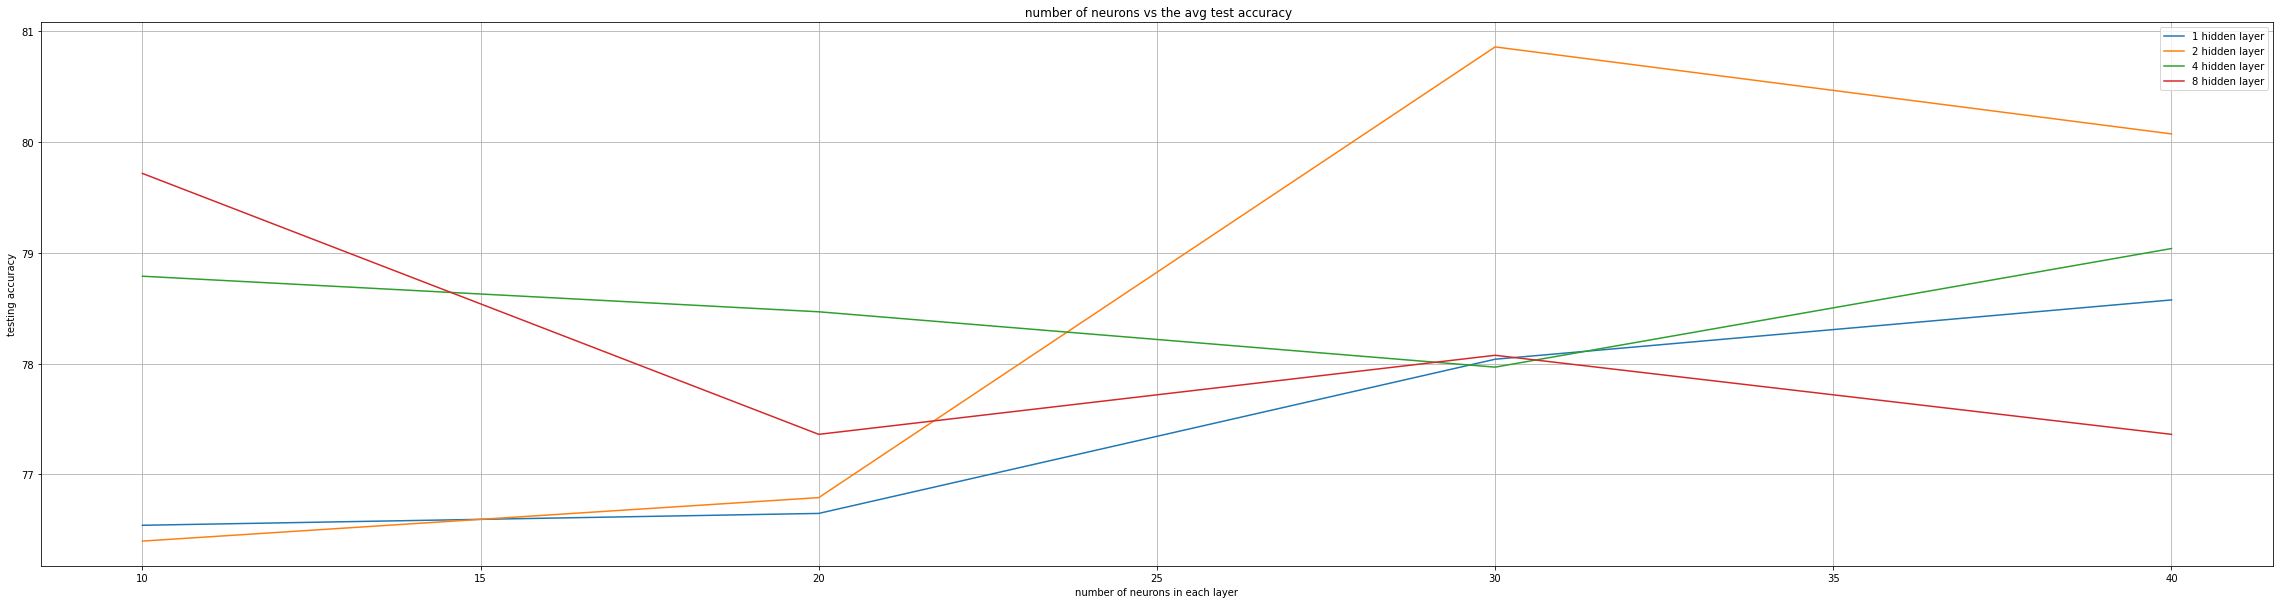

In [23]:
"""
Plot the number of neurons vs the avg test accuracy. 
(You will plot only one figure that shows 4 different lines, each one for a different number of hidden layers)"""
# plot 
plt.plot(NN,ts_avg_HL_1)
plt.plot(NN,ts_avg_HL_2)
plt.plot(NN,ts_avg_HL_4)
plt.plot(NN,ts_avg_HL_8)

plt.xlabel("number of neurons in each layer")
plt.ylabel("testing accuracy")
plt.legend(['1 hidden layer','2 hidden layer','4 hidden layer','8 hidden layer'])
plt.title(" number of neurons vs the avg test accuracy")
plt.grid()

In [24]:
draw_df_3_2(df_HL)

In [25]:
"""
Highlight the combination that achieves the highest average accuracy for both training and test accuracies at the same time. 
(if you cannot find a combination that achieves both at the same time, 
then highlight the combination that achieves the highest average test accuracy)
"""

BS_value =Best_BS_num
NN_s =[10,20,30,40]
HL_s = [1,2,4,8]

tr_accs_HL_NN = [tr_avg_HL_1,tr_avg_HL_2,tr_avg_HL_4,tr_avg_HL_8]
ts_accs_HL_NN = [ts_avg_HL_1,ts_avg_HL_2,ts_avg_HL_4,ts_avg_HL_8]
for h in range(len(HL_s)):
  for nn in range(len(NN_s)):
    print(f"{HL_s[h]} hidden layer , {NN_s[nn]} neurons,{tr_accs_HL_NN[h][nn]:.2f}% training accuracy , {ts_accs_HL_NN[h][nn]:.2f}% testing accuracy")
    print("====================================================================")

# get the index of max testing 
HL_max_index_testing = -1
NN_max_index_testing = -1


# get the index of max training 
HL_max_index_training = -1
NN_max_index_training = -1

best_HL = -1
best_NN = -1

best_tr = -1
best_ts = -1
# condition 
for h in range(len(HL_s)):
  for nn in range(len(NN_s)):
    if(tr_accs_HL_NN[h][nn]>best_tr):
      best_tr = tr_accs_HL_NN[h][nn]
      HL_max_index_training = h
      NN_max_index_training = nn
    if(ts_accs_HL_NN[h][nn]>best_ts):
      best_ts = ts_accs_HL_NN[h][nn]
      HL_max_index_testing = h
      NN_max_index_testing = nn

print("------------------------------------------------------------------")
print(f"best training accuracy {best_tr:.2f}%")
print(f"best testing  accuracy {best_ts:.2f}%")
print("------------------------------------------------------------------")

# if both the indeces are the same return that index else return the index of max testing 
if(HL_max_index_testing==HL_max_index_training)and(NN_max_index_testing==NN_max_index_training):
  best_HL = HL_max_index_testing
  best_NN = NN_max_index_testing
else:
  best_HL = HL_max_index_testing
  best_NN = NN_max_index_testing

print(f"best number of hidden layers :{HL_s[best_HL]}")
print(f"best number of neuron in each layer :{NN_s[best_NN]}")



1 hidden layer , 10 neurons,77.95% training accuracy , 76.54% testing accuracy
1 hidden layer , 20 neurons,80.54% training accuracy , 76.65% testing accuracy
1 hidden layer , 30 neurons,82.44% training accuracy , 78.04% testing accuracy
1 hidden layer , 40 neurons,83.06% training accuracy , 78.57% testing accuracy
2 hidden layer , 10 neurons,80.27% training accuracy , 76.40% testing accuracy
2 hidden layer , 20 neurons,84.03% training accuracy , 76.79% testing accuracy
2 hidden layer , 30 neurons,85.93% training accuracy , 80.86% testing accuracy
2 hidden layer , 40 neurons,86.88% training accuracy , 80.07% testing accuracy
4 hidden layer , 10 neurons,81.62% training accuracy , 78.79% testing accuracy
4 hidden layer , 20 neurons,86.96% training accuracy , 78.47% testing accuracy
4 hidden layer , 30 neurons,90.70% training accuracy , 77.97% testing accuracy
4 hidden layer , 40 neurons,92.35% training accuracy , 79.04% testing accuracy
8 hidden layer , 10 neurons,82.58% training accuracy

#  Vary the MLP parameters ( Learning rate and different optimizers)


In [26]:
BS_value =Best_BS_num
NN_s =[10,20,30,40]
HL_s = [1,2,4,8]

val_accs_HL_NN = [val_avg_HL_1,val_avg_HL_2,val_avg_HL_4,val_avg_HL_8]

for h in range(len(HL_s)):
  for nn in range(len(NN_s)):
    print(f"{HL_s[h]} hidden layer , {NN_s[nn]} neurons, {val_accs_HL_NN[h][nn]:.2f}% validation accuracy")
    print("====================================================================")

# get the index of max validation 
HL_max_index_val = -1
NN_max_index_val = -1


best_HL = -1
best_NN = -1
best_val = -1

# condition 
for h in range(len(HL_s)):
  for nn in range(len(NN_s)):
    if(val_accs_HL_NN[h][nn]>best_val):
      best_val = val_accs_HL_NN[h][nn]
      HL_max_index_val = h
      NN_max_index_val = nn


print("------------------------------------------------------------------")
print(f"highest average validation  accuracy {best_val:.2f}%")
print("------------------------------------------------------------------")

best_HL = HL_max_index_val
best_NN = NN_max_index_val

print("Based on the  highest validation accuracy : ")
Best_HiddenLayer_num = HL_s[best_HL]
print(f"best number of hidden layers :{Best_HiddenLayer_num}")
Best_Neuron_num = NN_s[best_NN]
print(f"best number of neuron in each layer :{Best_Neuron_num}")

1 hidden layer , 10 neurons, 75.76% validation accuracy
1 hidden layer , 20 neurons, 76.36% validation accuracy
1 hidden layer , 30 neurons, 76.51% validation accuracy
1 hidden layer , 40 neurons, 76.83% validation accuracy
2 hidden layer , 10 neurons, 76.65% validation accuracy
2 hidden layer , 20 neurons, 77.04% validation accuracy
2 hidden layer , 30 neurons, 78.40% validation accuracy
2 hidden layer , 40 neurons, 77.72% validation accuracy
4 hidden layer , 10 neurons, 77.90% validation accuracy
4 hidden layer , 20 neurons, 77.11% validation accuracy
4 hidden layer , 30 neurons, 78.04% validation accuracy
4 hidden layer , 40 neurons, 78.43% validation accuracy
8 hidden layer , 10 neurons, 78.22% validation accuracy
8 hidden layer , 20 neurons, 77.90% validation accuracy
8 hidden layer , 30 neurons, 78.47% validation accuracy
8 hidden layer , 40 neurons, 78.32% validation accuracy
------------------------------------------------------------------
highest average validation  accuracy 

In [27]:
df_optimizers = [[],[],[],[],[]]

In [28]:
from tensorflow_addons import optimizers
# so from each previous question the combination that gives the heighest average validation accuracy are : 
"""
Best_HiddenLayer_num
Best_Neuron_num
Best_BS_num
"""
# None,SGD_1,SGD_5,SGD_9,Rprop

optimizers_names = ["adamW",'SGD_1','SGD_5','SGD_9','Rprop']

tr_avg_LR_1_10 = []
ts_avg_LR_1_10 = []

tr_avg_LR_1_100 = []
ts_avg_LR_1_100 = []

tr_avg_LR_1_1000 = []
ts_avg_LR_1_1000 = []


val_avg_LR_1_10 = []
val_avg_LR_1_100 = []
val_avg_LR_1_1000= []



# with LR 0.1
for i in range(len(optimizers_names)):
  print(f"with {Best_BS_num} Batch size  that achive the heighest validation accuracy")
  print(f"with {Best_HiddenLayer_num} hidden  layers that achive the heighest validation accuracy")
  print(f"with {Best_Neuron_num} neurons that achive the heighest validation accuracy ")
  print(f"with {optimizers_names[i]} optimizer")
  print(f"with 0.1 learning rate")
  max_train_acc,min_train_acc,avg_train_acc ,max_test_acc,min_test_acc,avg_test_acc,total_training_loss ,total_testing_loss ,total_y_pred , total_y_pred_result,avg_val_acc= build_5_time_testingBased(BS = Best_BS_num , HL = Best_HiddenLayer_num, NN = Best_Neuron_num , op=optimizers_names[i],LR=0.1)
  tr_avg_LR_1_10.append(avg_train_acc)
  ts_avg_LR_1_10.append(avg_test_acc)
  val_avg_LR_1_10.append(avg_val_acc)
  df_optimizers[i].append(max_train_acc)
  df_optimizers[i].append(max_test_acc)
  df_optimizers[i].append(min_train_acc)
  df_optimizers[i].append(min_test_acc)
  df_optimizers[i].append(avg_train_acc)
  df_optimizers[i].append(avg_test_acc)
  print("----------------------------------------------------------------------")
# with LR 0.01
for i in range(len(optimizers_names)):
  print(f"with {Best_BS_num} Batch size  that achive the heighest validation accuracy")
  print(f"with {Best_HiddenLayer_num} hidden  layers that achive the heighest validation accuracy")
  print(f"with {Best_Neuron_num} neurons that achive the heighest validation accuracy ")
  print(f"with {optimizers_names[i]} optimizer")
  print(f"with 0.01 learning rate")
  max_train_acc,min_train_acc,avg_train_acc ,max_test_acc,min_test_acc,avg_test_acc,total_training_loss ,total_testing_loss ,total_y_pred , total_y_pred_result,avg_val_acc= build_5_time_testingBased(BS = Best_BS_num , HL = Best_HiddenLayer_num, NN = Best_Neuron_num , op=optimizers_names[i],LR=0.01)
  tr_avg_LR_1_100.append(avg_train_acc) 
  ts_avg_LR_1_100.append(avg_test_acc)
  val_avg_LR_1_100.append(avg_val_acc)
  df_optimizers[i].append(max_train_acc)
  df_optimizers[i].append(max_test_acc)
  df_optimizers[i].append(min_train_acc)
  df_optimizers[i].append(min_test_acc)
  df_optimizers[i].append(avg_train_acc)
  df_optimizers[i].append(avg_test_acc)
  print("----------------------------------------------------------------------")
# with LR 0.001
for i in range(len(optimizers_names)):
  print(f"with {Best_BS_num} Batch size  that achive the heighest validation accuracy")
  print(f"with {Best_HiddenLayer_num} hidden  layers that achive the heighest validation accuracy")
  print(f"with {Best_Neuron_num} neurons that achive the heighest validation accuracy ")
  print(f"with {optimizers_names[i]} optimizer")
  print(f"with 0.001 learning rate")
  max_train_acc,min_train_acc,avg_train_acc ,max_test_acc,min_test_acc,avg_test_acc,total_training_loss ,total_testing_loss ,total_y_pred , total_y_pred_result,avg_val_acc= build_5_time_testingBased(BS = Best_BS_num , HL = Best_HiddenLayer_num, NN = Best_Neuron_num , op=optimizers_names[i],LR=0.001)
  tr_avg_LR_1_1000.append(avg_train_acc) 
  ts_avg_LR_1_1000.append(avg_test_acc) 
  val_avg_LR_1_1000.append(avg_val_acc)
  df_optimizers[i].append(max_train_acc)
  df_optimizers[i].append(max_test_acc)
  df_optimizers[i].append(min_train_acc)
  df_optimizers[i].append(min_test_acc)
  df_optimizers[i].append(avg_train_acc)
  df_optimizers[i].append(avg_test_acc)
  print("----------------------------------------------------------------------")


with 64 Batch size  that achive the heighest validation accuracy
with 8 hidden  layers that achive the heighest validation accuracy
with 30 neurons that achive the heighest validation accuracy 
with adamW optimizer
with 0.1 learning rate
run 1:
18/18 [==============================] - 0s 621us/step
run 2:
18/18 [==============================] - 0s 598us/step
run 3:
18/18 [==============================] - 0s 592us/step
run 4:
18/18 [==============================] - 0s 629us/step
run 5:
18/18 [==============================] - 0s 590us/step
min training   accuracy 23.8640695810318%
max training   accuracy 25.467735528945923%
avg training   accuracy 24.58953768014908%
min testing    accuracy 21.746881306171417%
max testing    accuracy 27.807486057281494%
avg testing    accuracy 24.52762931585312%
avg validation    accuracy 23.921568989753723%
----------------------------------------------------------------------
with 64 Batch size  that achive the heighest validation accuracy
with 8 hi

In [29]:
draw_df_3_3(df_optimizers)

In [30]:
"""
Highlight the combination that achieves the highest average accuracy for both training and test accuracies at the same time. 
(if you cannot find a combination that achieves both at the same time, 
then highlight the combination that achieves the highest average test accuracy)
"""
"""
Best_HiddenLayer_num
Best_Neuron_num
Best_BS_num
"""
# None,SGD_1,SGD_5,SGD_9,Rprop
LR = [0.1,0.01,0.001]
optimizers_names = ["adamW",'SGD_1','SGD_5','SGD_9','Rprop']


tr_accs_optmizer_LR = [tr_avg_LR_1_10,tr_avg_LR_1_100,tr_avg_LR_1_1000]
ts_accs_optmizer_LR = [ts_avg_LR_1_10,ts_avg_LR_1_100,ts_avg_LR_1_1000]

for h in range(len(LR)):
  for nn in range(len(optimizers_names)):
    print(f"{LR[h]} Learning Rate , {optimizers_names[nn]} optimizer,{tr_accs_optmizer_LR[h][nn]:.2f}% training accuracy , {ts_accs_optmizer_LR[h][nn]:.2f}% testing accuracy")
    print("====================================================================")

# get the index of max testing 
LR_max_index_testing = -1
optmizer_max_index_testing = -1

# get the index of max training 
LR_max_index_training = -1
optimizer_max_index_training = -1

best_LR = -1
best_optimizer = -1

best_tr = -1
best_ts = -1

# condition 
for h in range(len(LR)):
  for nn in range(len(optimizers_names)):
    if(tr_accs_optmizer_LR[h][nn]>best_tr):
      best_tr = tr_accs_optmizer_LR[h][nn]
      LR_max_index_training = h
      optimizer_max_index_training = nn

    if(ts_accs_optmizer_LR[h][nn]>best_ts):
      best_ts = ts_accs_optmizer_LR[h][nn]
      LR_max_index_testing = h
      optmizer_max_index_testing = nn

print("------------------------------------------------------------------")
print(f"best training accuracy {best_tr:.2f}%")
print(f"best testing  accuracy {best_ts:.2f}%")
print("------------------------------------------------------------------")

# if both the indeces are the same return that index else return the index of max testing 
if(LR_max_index_testing==LR_max_index_training)and(optmizer_max_index_testing==optimizer_max_index_training):
  best_LR = LR_max_index_testing
  best_optimizer = optmizer_max_index_testing
else:
  best_LR = LR_max_index_testing
  best_optimizer = optmizer_max_index_testing

print(f"best Learning Rate :{LR[best_LR]}")
print(f"best optimizer :{optimizers_names[best_optimizer]}")



0.1 Learning Rate , adamW optimizer,24.59% training accuracy , 24.53% testing accuracy
0.1 Learning Rate , SGD_1 optimizer,84.98% training accuracy , 77.29% testing accuracy
0.1 Learning Rate , SGD_5 optimizer,49.62% training accuracy , 44.42% testing accuracy
0.1 Learning Rate , SGD_9 optimizer,24.10% training accuracy , 23.49% testing accuracy
0.1 Learning Rate , Rprop optimizer,24.30% training accuracy , 26.84% testing accuracy
0.01 Learning Rate , adamW optimizer,78.28% training accuracy , 74.72% testing accuracy
0.01 Learning Rate , SGD_1 optimizer,86.39% training accuracy , 79.36% testing accuracy
0.01 Learning Rate , SGD_5 optimizer,88.55% training accuracy , 78.82% testing accuracy
0.01 Learning Rate , SGD_9 optimizer,92.15% training accuracy , 78.82% testing accuracy
0.01 Learning Rate , Rprop optimizer,81.64% training accuracy , 79.96% testing accuracy
0.001 Learning Rate , adamW optimizer,92.39% training accuracy , 77.29% testing accuracy
0.001 Learning Rate , SGD_1 optimize

# Vary the MLP parameters (Activation function)

In [31]:
Best_BS_value =Best_BS_num
Best_HL_num = Best_HiddenLayer_num
Best_NN_num = Best_Neuron_num

# check the best number for the Learning Rate and the best optimizer 
LR_s = [0.1,0.01,0.001]
optimizers_names = ["adamW",'SGD_1','SGD_5','SGD_9','Rprop']

val_accs_LR_optimizers = [val_avg_LR_1_10 ,val_avg_LR_1_100 ,val_avg_LR_1_1000]


for h in range(len(LR_s)):
  for nn in range(len(optimizers_names)):
    print(f"{LR_s[h]} Learning Rate , {optimizers_names[nn]} optimizer, {val_accs_LR_optimizers[h][nn]:.2f} % validation accuracy")
    print("====================================================================")

# get the index of max validation 
LR_max_index_val = -1
optimizer_max_index_val = -1


best_LR = -1
best_optimizer = -1
best_val = -1

# condition 
for h in range(len(LR_s)):
  for nn in range(len(optimizers_names)):
    if(val_accs_LR_optimizers[h][nn]>best_val):
      best_val = val_accs_LR_optimizers[h][nn]
      LR_max_index_val = h
      optimizer_max_index_val = nn


print("------------------------------------------------------------------")
print(f"highest average validation  accuracy {best_val:.2f}%")
print("------------------------------------------------------------------")


best_LR = LR_max_index_val
best_optimizer = optimizer_max_index_val

print("Based on the  highest validation accuracy : ")
Best_LR_num = LR_s[best_LR]
print(f"best number of Learning Rate :{Best_LR_num}")
Best_optimizer_name = optimizers_names[best_optimizer]
print(f"best optimizer :{Best_optimizer_name}")

0.1 Learning Rate , adamW optimizer, 23.92 % validation accuracy
0.1 Learning Rate , SGD_1 optimizer, 77.79 % validation accuracy
0.1 Learning Rate , SGD_5 optimizer, 46.74 % validation accuracy
0.1 Learning Rate , SGD_9 optimizer, 24.56 % validation accuracy
0.1 Learning Rate , Rprop optimizer, 22.64 % validation accuracy
0.01 Learning Rate , adamW optimizer, 76.11 % validation accuracy
0.01 Learning Rate , SGD_1 optimizer, 78.57 % validation accuracy
0.01 Learning Rate , SGD_5 optimizer, 77.75 % validation accuracy
0.01 Learning Rate , SGD_9 optimizer, 79.43 % validation accuracy
0.01 Learning Rate , Rprop optimizer, 78.22 % validation accuracy
0.001 Learning Rate , adamW optimizer, 77.65 % validation accuracy
0.001 Learning Rate , SGD_1 optimizer, 72.44 % validation accuracy
0.001 Learning Rate , SGD_5 optimizer, 75.04 % validation accuracy
0.001 Learning Rate , SGD_9 optimizer, 78.43 % validation accuracy
0.001 Learning Rate , Rprop optimizer, 78.89 % validation accuracy
----------

In [13]:
df_acti=[[]]

In [15]:
#the combiation that gives the highest validation accuracy 
train_avg_accs = []
testing_avg_accs = []
val_avg_Accs = []
confusion_matrix_lst = []
AF_s=["relu","leaky_relu","sigmoid","tanh"]
for af in AF_s:
  print(f"with {Best_BS_value} Batch size")
  print(f"with {Best_HL_num} hidden Layers")
  print(f"with {Best_NN_num} neuron in each layer")
  print(f"with {Best_LR_num} Learning Rate")
  print(f"with {Best_optimizer_name} optimizer")
  print(f"with {af} activation function")
  max_train_acc,min_train_acc,avg_train_acc ,max_test_acc,min_test_acc,avg_test_acc,total_training_loss ,total_testing_loss ,total_y_pred , total_y_pred_result,avg_val_acc= build_5_time_testingBased(BS=Best_BS_value,HL=Best_HL_num ,NN=Best_NN_num,LR=Best_LR_num,op=Best_optimizer_name,AF = af)
  train_avg_accs.append(avg_train_acc)
  testing_avg_accs.append(avg_test_acc)
  val_avg_Accs.append(avg_val_acc)
  confusion_matrix_lst.append(total_y_pred)
  df_acti[0].append(max_train_acc)
  df_acti[0].append(max_test_acc)
  df_acti[0].append(min_train_acc)
  df_acti[0].append(min_test_acc)
  df_acti[0].append(avg_train_acc)
  df_acti[0].append(avg_test_acc)
  print("------------------------------------------------------------------------")
  

with 64 Batch size
with 8 hidden Layers
with 30 neuron in each layer
with 0.01 Learning Rate
with SGD_9 optimizer
with relu activation function
run 1:
18/18 [==============================] - 0s 2ms/step
run 2:
18/18 [==============================] - 0s 3ms/step
run 3:
18/18 [==============================] - 0s 2ms/step
run 4:
18/18 [==============================] - 0s 1ms/step
run 5:
18/18 [==============================] - 0s 2ms/step
min training   accuracy 87.66704797744751%
max training   accuracy 92.43986010551453%
avg training   accuracy 90.84383368492126%
min testing    accuracy 71.47949934005737%
max testing    accuracy 80.92691898345947%
avg testing    accuracy 78.21746945381165%
avg validation    accuracy 78.39572191238403%
------------------------------------------------------------------------
with 64 Batch size
with 8 hidden Layers
with 30 neuron in each layer
with 0.01 Learning Rate
with SGD_9 optimizer
with leaky_relu activation function
run 1:
18/18 [===============

In [16]:
draw_df_3_4(df_acti)

In [17]:
for t in range(len(testing_avg_accs)):
  print(f"testing accuracy : {testing_avg_accs[t]:.2f}% , activation function :{AF_s[t]}")
print("=======================================================================")
print(f"the best activation function based on the testing accuracy : {AF_s[testing_avg_accs.index(np.max(testing_avg_accs))]}")
print("=======================================================================")


testing accuracy : 78.22% , activation function :relu
testing accuracy : 78.93% , activation function :leaky_relu
testing accuracy : 22.64% , activation function :sigmoid
testing accuracy : 76.43% , activation function :tanh
the best activation function based on the testing accuracy : leaky_relu


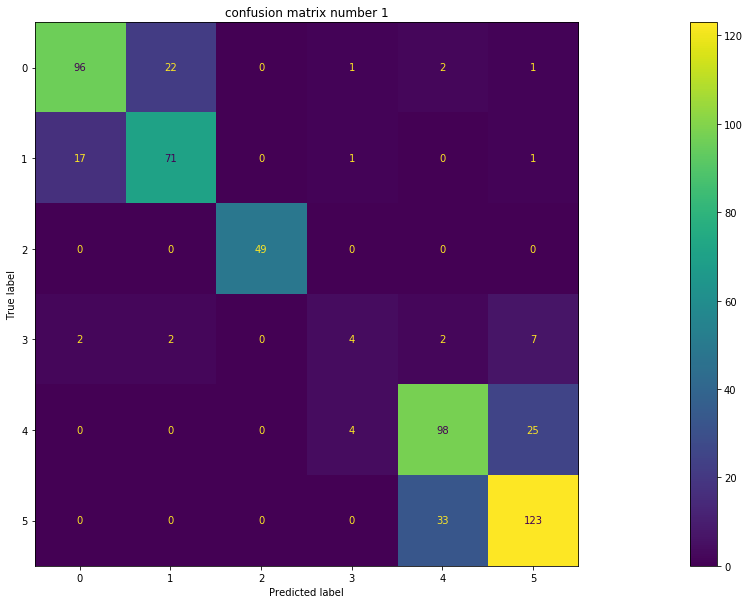

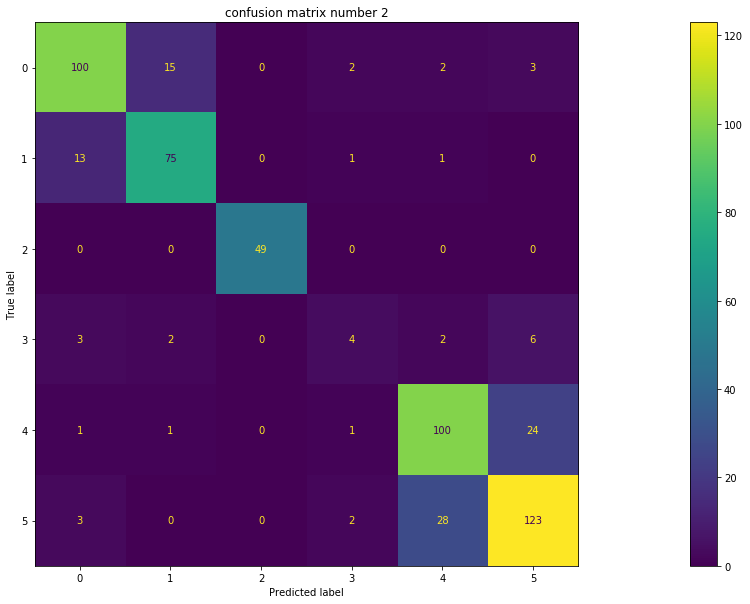

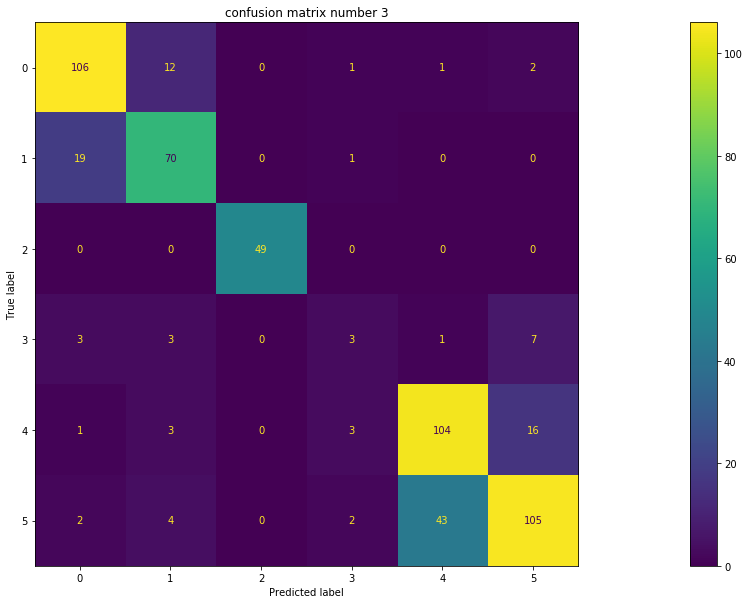

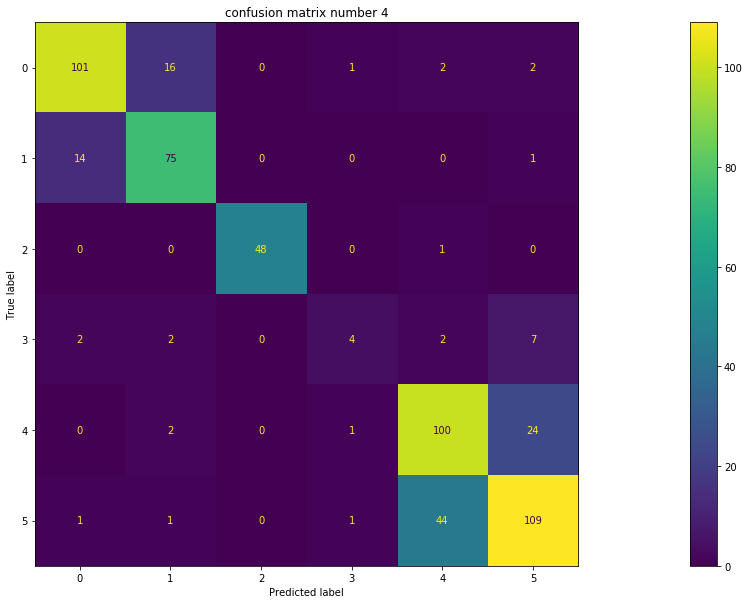

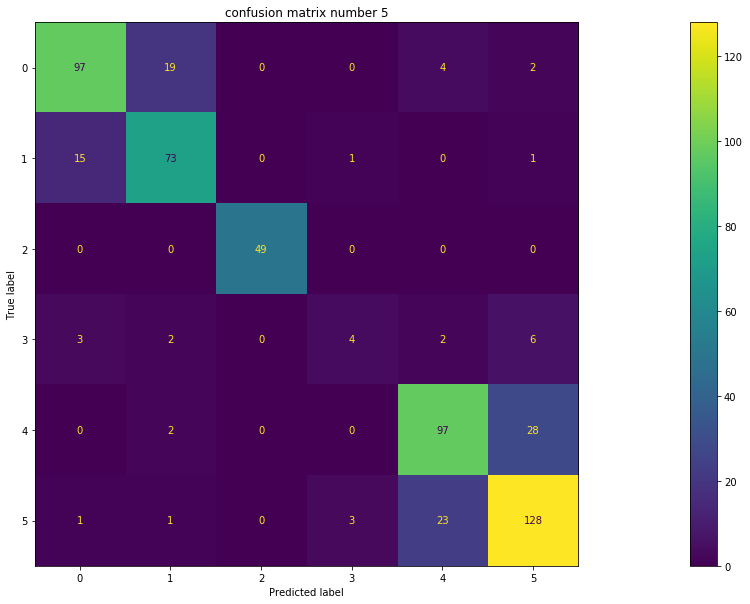

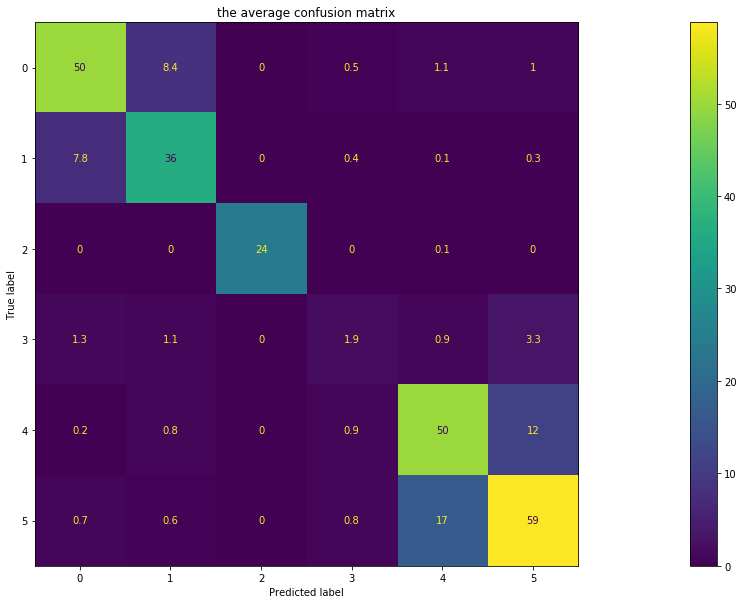

In [18]:
plot_avg_confusion_matrix(confusion_matrix_lst[testing_avg_accs.index(np.max(testing_avg_accs))])